In [2]:
# Permet de tout executer au lancement du notebook + conserver le notebook actif pendant 2h
from IPython.display import Javascript
from masquer import *
Javascript("""
function repeter(){
IPython.notebook.kernel.execute("a=1");
}
// execute a = 1 en python toutes les 8 minutes pendant 2h
let timerId = setInterval(() => repeter(), 4800);
setTimeout(() => { clearInterval(timerId); alert('fin de cession'); }, 7200000);

// Supprimer la taille limite pour la sortie d'une cellule
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
};
IPython.notebook.kernel.execute("url = '" + window.location + "'");

// Exécuter toutes les cellule du notebook
    require(
        ['base/js/namespace', 'jquery'], 
        function(jupyter, $) {
            
                
                jupyter.actions.call('jupyter-notebook:run-all-cells-below');
                jupyter.actions.call('jupyter-notebook:save-notebook');
                Jupyter.actions.call('jupyter-notebook:hide-header')

        }
    );""")

<IPython.core.display.Javascript object>

# Correction DS 2 - MP

## I. Récursivité

1. Ecrire une fonction itérative **dec2bin** qui prend en argument un entier naturel **n** et qui renvoie une chaine de caratères représentant la valeur binaire de cet entier.

In [3]:
def dec2bin(n:int) -> str:
    """
    Prend un entier naturel n en argument
    et renvoie une chaine de caractère
    correspondant à ce même nombre en base 2
    """
    assert type(n) == int, "On attend n entier naturel"
    assert n >= 0, "Il faut n positif ou nul"
    reponse = "" # on initialise la chaine de caractère
    q = n
    while q > 0: # on s'arrête lorsque le quotient est nul
        reponse = str(q%2) + reponse # chaque reste est placé à gauche du précédent
        q = q // 2 # q est le nouveau quotient de la division euclidienne de q par deux
    return reponse

In [4]:
dec2bin(18) # on essaye sur les données d'exemple

'10010'

In [5]:
help(dec2bin)

Help on function dec2bin in module __main__:

dec2bin(n: int) -> str
    Prend un entier naturel n en argument
    et renvoie une chaine de caractère
    correspondant à ce même nombre en base 2



2. Ecrire une fonction récursive dec2bin2 qui réalise la même opération.

In [6]:
def dec2bin2(n :int) -> str:
    """
    Prend un entier naturel n en argument
    et renvoie une chaine de caractère
    correspondant à ce même nombre en base 2
    """
    assert type(n) == int, "On attend n entier naturel"
    assert n >= 0, "Il faut n positif ou nul"
    if n == 0:
        return "" # si le quotient est nul on arrête
    else:
        return dec2bin2(n//2) + str(n%2) # on écrit les restes de droite vers la gauche

In [7]:
dec2bin2(18)

'10010'

## II. Trier des listes partiellement triées

Voici quelques fonctions permettant de créer une structure de pile

In [8]:
def init() -> list:
    """
    renvoie une pile vide
    """
    return []

def isEmpty(stack: list) -> bool:
    """
    prend comme argument une pile sous forme d'une liste python
    et renvoie un booléen
    True si la pile est vide
    False sinon
    """
    assert type(stack) == list
    return stack == [] # booléen

def push(val,stack):
    """
    prend comme argument une valeur (int, float, str, ...)
    et l'ajoute sur le dessus de la pile stack
    """
    stack.append(val)
    return None # pas obligatoire, car fait systématiquement par l'interpréteur

def pop(stack):
    """
    prend comme argument une pile
    dépile l'élément du dessus et le renvoie
    """
    assert not isEmpty(stack)
    return stack.pop() # Exécute stack.pop() et renvoie ce que renvoie stack.pop()


12. Ecrire une fonction **scm(s)** qui prend une liste **s** en paramètre et renvoie la liste ordonnée des couples d'indices correspondant au partitionnement en *scm* de **s**.

In [9]:
def scm(s: list) -> list:
    """
    prend une liste s en paramètre et 
    renvoie la liste ordonnée des couples d'indices
    correspondant au partitionnement en scm de s
    """
    assert type(s) == list
    reponse = [] # on initialise la liste réponse
    d = 0 # on démarre le partitionnement à l'indice 0
    f = 0
    n = len(s)
    for i in range(1, n):
        if s[i] >= s[i-1]: # si c'est bien rangé
            f += 1 # on incrémente l'indice de la fin de la partition
        else: # sinon
            reponse.append((d,f)) # on stocke les indices de la partition précédente
            d = i # on démarre une nouvelle partition
            f = i
    reponse.append((d,f)) # pour ajouter le dernier couple
    return reponse

In [10]:
s= [3, 4, 8, 11, 1, 5, 2, 7, 9, 0, 10, 0]
scm(s) # Exemple du sujet

[(0, 3), (4, 5), (6, 8), (9, 10), (11, 11)]

13. Ecrire une procédure **fusionner(s, r1, r2)** qui prend une liste **s** en paramètre ainsi que deux *scm* consécutives encodées par leurs indices de début et de fin, et les fusionne en une seule *scm*.

In [11]:
def copier(s,debut,fin): # Proposée par le sujet mais vous pouviez l'utiliser sans la coder
    return s[debut:fin+1]

copier(s,0,3)

[3, 4, 8, 11]

In [12]:
def fusionner(s, r1, r2): # Fonctionnement proche d el'algorithme de fusion du tri fusion vu en classe
    l1 = copier(s, *r1)
    l2 = copier(s, *r2)
    l = []
    i = r1[0]
    while l1 != [] and l2 != []:
        if l1[0] < l2[0]:
            l.append(l1.pop(0))
        else:
            l.append(l2.pop(0))
    l = l + l1 + l2
    s[r1[0]:r2[1]+1] = l # On peut aussi le faire avec une boucle
    return

In [13]:
print(s)
fusionner(s,(0,3),(4,5))
print(s)

[3, 4, 8, 11, 1, 5, 2, 7, 9, 0, 10, 0]
[1, 3, 4, 5, 8, 11, 2, 7, 9, 0, 10, 0]


14. A l'aide de la procédure **fusionner** demandée à la question 13, écrir eune procédure **depileFusionneRemplace(s, pile)** qui prend en paramètre une liste **s** ainsi qu'une pile de *scm* (sous la forme de couples d'indices de début et de fin). Cette procédure devra retirer les deux *scm* au sommet de la pile, les fusionner dans la liste **s** et replacer les indices de la *scm* fusionnée au sommet de la pile.

In [14]:
def depileFusionneRemplace(s, pile):
    r2 = pop(pile)
    r1 = pop(pile)
    fusionner(s, r1, r2)
    push((r1[0],r2[1]), pile) # La nouvelle partition va du début de la première à la fin de la seconde
    return

In [15]:
s= [3, 4, 8, 11, 1, 5, 2, 7, 9, 0, 10, 0]
pile = [(0, 3), (4, 5), (6, 8)]
depileFusionneRemplace(s, pile) # Exemple du sujet
print(s)
print(pile)

[3, 4, 8, 11, 1, 2, 5, 7, 9, 0, 10, 0]
[(0, 3), (4, 8)]


15. En utilisant les questions précédentes, écrire une procédure **alphaTri(s)** qui prend en paramètre une liste **s** et trie cette liste en utilisant l'algorithme $\alpha-tri$ décrit ci-dessus.

In [16]:
def taille(stack): #renvoie la taille d'une pile
    return len(stack)

def longueur(part):
    return part[1]+1 - part[0]

def alphaTri(s): # Tous les 'print' sont inutiles mais permettentd'obtenir la sortie de l'exemple du sujet
    print("** Découpage en scm **")
    L = scm(s) # partitionnement
    print("Liste à trier:", s)
    print("Liste des scm:", L)
    
    
    print("** Première phase **")
    pile = init()
    for element in L:
        push(element,pile)
        print("Etat de la pile:", pile)
        if taille(pile) >= 2:
            z = pile[-1]
            y = pile[-2] # suggéré par le sujet il s'agit juste d electure et pas de modification
            while longueur(y) < 2* longueur(z):
                depileFusionneRemplace(s,pile)
                print("Fusion des scm:",y,"et",z,". Etat de la liste:",s)
                if taille(pile) < 2:
                    break
                else:
                    y = pile[-2]
                    z = pile[-1]
    
    print("** Deuxième phase **")
    while taille(pile) > 1:
        y = pile[-2]
        z = pile[-1]
        depileFusionneRemplace(s,pile)
        print("Fusion des scm:",y,"et",z,". Etat de la liste:",s)
        print("Etat de la pile:",pile)
    print("La liste triée:",s)
    return           

In [17]:
s= [3, 4, 8, 11, 1, 5, 2, 7, 9, 0, 10, 0]
alphaTri(s)

** Découpage en scm **
Liste à trier: [3, 4, 8, 11, 1, 5, 2, 7, 9, 0, 10, 0]
Liste des scm: [(0, 3), (4, 5), (6, 8), (9, 10), (11, 11)]
** Première phase **
Etat de la pile: [(0, 3)]
Etat de la pile: [(0, 3), (4, 5)]
Etat de la pile: [(0, 3), (4, 5), (6, 8)]
Fusion des scm: (4, 5) et (6, 8) . Etat de la liste: [3, 4, 8, 11, 1, 2, 5, 7, 9, 0, 10, 0]
Fusion des scm: (0, 3) et (4, 8) . Etat de la liste: [1, 2, 3, 4, 5, 7, 8, 9, 11, 0, 10, 0]
Etat de la pile: [(0, 8), (9, 10)]
Etat de la pile: [(0, 8), (9, 10), (11, 11)]
** Deuxième phase **
Fusion des scm: (9, 10) et (11, 11) . Etat de la liste: [1, 2, 3, 4, 5, 7, 8, 9, 11, 0, 0, 10]
Etat de la pile: [(0, 8), (9, 11)]
Fusion des scm: (0, 8) et (9, 11) . Etat de la liste: [0, 0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11]
Etat de la pile: [(0, 11)]
La liste triée: [0, 0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11]


## III. L'algorithme du paquet cadeau

In [18]:
tab = [[0, 0], [1, 4], [1, 8], [4, 1], [4, 4], [5, 9], [5, 6], [7, -1], [7, 2], [8, 5], [11, 6], [13, 1]]

**Question 1.** Ecrire une fonction **plusBas(tab, n)** qui prend en parametre le tableau *tab* de taille $2\times n$ et qui renvoie l'indice *j* du point le plus bas (c'est à dire de plus petite ordonnée) parmi les points du nuage *P*. En cas d'égalité, votre fonction devra renvoyer l'indice du point de plus petite abscisse parmi les points les plus bas.

In [19]:
def plusBas(tab, n):
    j = 0
    for i in range(1,n):
        if tab[i][1] < tab[j][1]:
            j = i
        elif tab[i][1] == tab[j][1] and tab[i][0] < tab[j][0]:
            j = i
    return j

In [20]:
plusBas(tab,len(tab))

7

**Question 2.** Sur le tableau exemple précédent, donner le résultat du test d'orientation pour les choix d'indices suivants:

- i = 0, j = 3, k = 4: Donne +1
- i = 8, j = 9, k = 10: donne -1

On peut le voir avec la figure ci-dessous

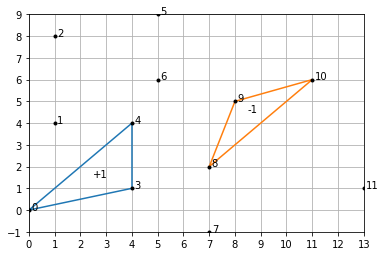

In [21]:
import matplotlib.pyplot as plt

x = []
y = []
for i in [0, 3, 4]:
    x.append(tab[i][0])
    y.append(tab[i][1])
x.append(x[0])
y.append(y[0])
plt.plot(x,y)
x = []
y = []
for i in [8, 9, 10]:
    x.append(tab[i][0])
    y.append(tab[i][1])
x.append(x[0])
y.append(y[0])
plt.plot(x,y)
plt.xlim([0,13])
plt.ylim([-1,9])
plt.xticks([i for i in range(14)])
plt.yticks([i for i in range(-1,10)])
for p in range(len(tab)):
    plt.plot(tab[p][0], tab[p][1],".",color="black")
    plt.text(tab[p][0]+0.1, tab[p][1],"{}".format(p))
plt.text(2.5,1.5,"+1")
plt.text(8.5,4.5,"-1")
plt.grid()
plt.show()

Ou par le calcul du détermiant (voir question suivante)

**Question 3.** Ecrire une fonction **orient(tab, i, j, k)** qui prend en paramètres le tableau tab, et trois indices de colonnes, potentiellement égaux, et qui renvoie le résultat (-1,  ou +1) du test d'orientation sur la séquence $(p_i, p_j, p_l)$ de points de *P*

In [22]:
def orient(tab, i, j , k):
    pipj = [tab[j][0] - tab[i][0], tab[j][1] - tab[i][1]]
    pipk = [tab[k][0] - tab[i][0], tab[k][1] - tab[i][1]]
    det = pipj[0]*pipk[1]-pipj[1]*pipk[0]
    if det > 0:
        return 1
    elif det < 0:
        return -1
    else:
        return 0

In [23]:
orient(tab, 0, 3, 4)

1

In [24]:
orient(tab, 8, 9, 10)

-1

**Question 5.** Décrire une réalisation en Python de la procédure. Elle prendra la forme d'une fonction **prochainPoint(tab,n,i)**, qui prend en paramètre le tableau *tab* de taille $2\times n$ ainsi que l'indice *i* du point inséré en dernier dans la paquet cadeau, et qui renvoie l'indice du prochain point à insérer. Le temps d'exécution de votre fonction doit être majoré par uen constante fois *n*, pour tous *n et i*. La constante doit être indépendante de *n et i*, et on ne demande pas de la préciser.

In [25]:
def prochainPoint(tab, n, i):
    j = 0 # il faut j différent de i 
    if j == i:
        j = 1
    for k in range(1, n): # On balaye toutes les valeurs de k
        if k != i and k != j: # il faut k différent de i
            if orient(tab,i,j,k) < 0: # si k = j on a orient = 0
                j = k # si orient < 0 alors Pk > Pj et Pk devient notre nouveau maxi
    return j # une fois tous les points balayés, on a déterminé notre maxi et donc le prochain point



Comme les points ne sont balayés qu'une seule fois et que pour chaque point, on execute un nombre entier de fois (nombre ne dépendant pas de i ou de n) des opérations unitaires (comparaison, affectation et fonction orient qui se fait elle aussi en temps constant) alors on peut majorer le temps d'exécution par une constante indépendant de n fois n.

**Question 6.** Décrire à la main le déroulement de la procédure **prochainPoint** sur l'exemple de la *figure 3.* Plus précisément, indiquer la séquence des points de $P\ \backslash\ \{p_{10}\}$ considérés et la valeur de l'indice du maximum à chaque itération.

In [26]:
On démarre avec i = 10, j = 0 et k = 1

SyntaxError: invalid syntax (<ipython-input-26-243083c64068>, line 1)

In [ ]:
plt.xlim([0,13])
plt.ylim([-1,9])
plt.xticks([i for i in range(14)])
plt.yticks([i for i in range(-1,10)])
for p in range(len(tab)):
    plt.plot(tab[p][0], tab[p][1],".",color="black")
    plt.text(tab[p][0]+0.1, tab[p][1],"{}".format(p))
plt.plot([tab[i][0] for i in [7,11,10]],[tab[i][1] for i in [7,11,10]])
plt.plot([tab[i][0] for i in [10,0]],[tab[i][1] for i in [10,0]],"--")
plt.grid()
plt.show()

In [ ]:
plt.xlim([0,13])
plt.ylim([-1,9])
plt.xticks([i for i in range(14)])
plt.yticks([i for i in range(-1,10)])
for p in range(len(tab)):
    plt.plot(tab[p][0], tab[p][1],".",color="black")
    plt.text(tab[p][0]+0.1, tab[p][1],"{}".format(p))
plt.plot([tab[i][0] for i in [7,11,10]],[tab[i][1] for i in [7,11,10]])
plt.plot([tab[i][0] for i in [10,0,1,10]],[tab[i][1] for i in [10,0,1,10]],"g")
plt.text(3,3,r"$P_0 < P_1$")
plt.grid()
plt.show()

On a donc j = 1.

On poursuit avec i = 10, j = 1 et k = 2

In [ ]:
plt.xlim([0,13])
plt.ylim([-1,9])
plt.xticks([i for i in range(14)])
plt.yticks([i for i in range(-1,10)])
for p in range(len(tab)):
    plt.plot(tab[p][0], tab[p][1],".",color="black")
    plt.text(tab[p][0]+0.1, tab[p][1],"{}".format(p))
plt.plot([tab[i][0] for i in [7,11,10]],[tab[i][1] for i in [7,11,10]])
plt.plot([tab[i][0] for i in [10,1,2,10]],[tab[i][1] for i in [10,1,2,10]],"g")
plt.text(3,6,r"$P_1 < P_2$")
plt.grid()
plt.show()

On a donc j = 2.

On poursuit avec i = 10, j = 2 et k = 3

In [ ]:
plt.xlim([0,13])
plt.ylim([-1,9])
plt.xticks([i for i in range(14)])
plt.yticks([i for i in range(-1,10)])
for p in range(len(tab)):
    plt.plot(tab[p][0], tab[p][1],".",color="black")
    plt.text(tab[p][0]+0.1, tab[p][1],"{}".format(p))
plt.plot([tab[i][0] for i in [7,11,10]],[tab[i][1] for i in [7,11,10]])
plt.plot([tab[i][0] for i in [10,2,3,10]],[tab[i][1] for i in [10,2,3,10]],"r")
plt.text(3,6,r"$P_3 < P_2$")
plt.grid()
plt.show()

On garde j = 2.

On poursuit avec i = 10, j = 2 et k = 4

In [ ]:
plt.xlim([0,13])
plt.ylim([-1,9])
plt.xticks([i for i in range(14)])
plt.yticks([i for i in range(-1,10)])
for p in range(len(tab)):
    plt.plot(tab[p][0], tab[p][1],".",color="black")
    plt.text(tab[p][0]+0.1, tab[p][1],"{}".format(p))
plt.plot([tab[i][0] for i in [7,11,10]],[tab[i][1] for i in [7,11,10]])
plt.plot([tab[i][0] for i in [10,2,4,10]],[tab[i][1] for i in [10,2,4,10]],"r")
plt.text(3,6,r"$P_4 < P_2$")
plt.grid()
plt.show()

In [ ]:
on garde j = 2
On poursuit avec i = 10, j = 2 et k = 5

In [ ]:
plt.xlim([0,13])
plt.ylim([-1,9])
plt.xticks([i for i in range(14)])
plt.yticks([i for i in range(-1,10)])
for p in range(len(tab)):
    plt.plot(tab[p][0], tab[p][1],".",color="black")
    plt.text(tab[p][0]+0.1, tab[p][1],"{}".format(p))
plt.plot([tab[i][0] for i in [7,11,10]],[tab[i][1] for i in [7,11,10]])
plt.plot([tab[i][0] for i in [10,2,5,10]],[tab[i][1] for i in [10,2,5,10]],"g")
plt.text(4,8,r"$P_2 < P_5$")
plt.grid()
plt.show()

On passe à j = 5.  
Comme Pj correspond au maximum pour la relation d'ordre, on ne changera plus de j pendant tout le reste du parcours.
* i = 10, j = 5, k = 6
* i = 10, j = 5, k = 7
* i = 10, j = 5, k = 8
* i = 10, j = 5, k = 9
* On ne passe pas par i = 10, j = 5 et k = 10 car il faut $i \ne k$
* i = 10, j = 5, k = 11

La fonction renvoie 5.

In [ ]:
plt.xlim([0,13])
plt.ylim([-1,9])
plt.xticks([i for i in range(14)])
plt.yticks([i for i in range(-1,10)])
for p in range(len(tab)):
    plt.plot(tab[p][0], tab[p][1],".",color="black")
    plt.text(tab[p][0]+0.1, tab[p][1],"{}".format(p))
plt.plot([tab[i][0] for i in [7,11,10]],[tab[i][1] for i in [7,11,10]])
plt.plot([tab[i][0] for i in [10,5]],[tab[i][1] for i in [10,5]],"--")
plt.grid()
plt.show()

**Question 7.** Ecrire une fonction **convJarvis(tab, n)** qui prend en parametre le tableau *tab* de taille $2\times n$ représentant le nuage *P*, et qui renvoie une liste contenant les indices des sommets du bord de l'enveloppe convexe de *P*, sans doublon.

In [28]:
def convJarvis(tab,n):
    tour = [plusBas(tab,len(tab))] # On détermine le premier point (temps d'exécution majoré par k1 fois n)
    i = prochainPoint(tab, len(tab), tour[0])
    while i != tour[0]: # On réalise m fois la boucle
        tour.append(i)
        i = prochainPoint(tab, len(tab), tour[-1]) # On trouve le prochain point, temps d'exécution majoré par k2 fois n
    return(tour)

Temps d'exécution majoré par k2*m*n + k3*m + k1*n  
il existe donc K tel que K*m*n majore le temps d'exécution de cette fonction.

In [29]:
convJarvis(tab, len(tab))

[7, 11, 10, 5, 2, 0]

**Question 4.** Ecrire les fonctions newStack, isEmpty, push, top et pop qui réalisent les opérations listées ci-dessous dans l'ordre où elles sont données.

In [30]:
def newStack():
    return []

def isEmpty(stack):
    return stack == []

def push(value, stack):
    stack.append(value)
    return None

def pop(stack):
    return stack.pop()

def top(stack):
    return stack[-1]

**Question 9.** Parmi les algorithmes de tri que vous connaissez, mentionnez-en un qui a un temps d'exécution majoré par une constante fois *n log n* sur les entrées de taille *n*.

Le tri fusion a une complexité en O(n log n) pour toutes les données d'entrée de taille n.

**Question 9b.** Proposer une implémentation du tri fusion afin de trier tab par abscisses croissantes.

In [34]:
def fusion(L1, L2): # L1 et L2 sont triées
    L = []
    while L1 != [] and L2 != []:
        if L1[0][0] < L2[0][0]:
            L.append(L1.pop(0))
        else:
            L.append(L2.pop(0))
    return L + L1 + L2

def tri(tab, n):
    if len(tab) <= 1:
        return tab
    else:
        return fusion(tri(tab[:n//2], n//2), tri(tab[n//2:],n-n//2))

In [35]:
tri(tab, len(tab))

[[0, 0],
 [1, 8],
 [1, 4],
 [4, 4],
 [4, 1],
 [5, 6],
 [5, 9],
 [7, 2],
 [7, -1],
 [8, 5],
 [11, 6],
 [13, 1]]

**Question 10.** Ecrire une fonction **majES(tab, es, i)** qui prend en paramètre un tableau *tab* ainsi que la pile *es* et l'indice *i* du point à visiter, et qui met à jour l'enveloppe supérieure du sous-nuage. Le temps d'exécution de votre fonction doit être majoré par une constante fois i.

In [72]:
def majES(tab, es, i):
    if not isEmpty(es):
        j = pop(es)
        while not isEmpty(es):
            k = top(es)
            if orient(tab,i,j,k) < 0:
                j = pop(es) # possible car il s'agit de k
            else:
                break
        push(j,es) # on remet j dans la pile
    push(i,es) # Dans tous les cas, on ajoute le point i

In [73]:
es = [0,2,5,8] # Exemple du sujet
t = tri(tab, len(tab))
majES(t,es,9)
es

[0, 2, 5, 9]

**Question 11.** Ecrire une fonction **majEI(tab, ei, i)** qui effectue la mise à jour de l'enveloppe inférieure, avec le même temps d'exécution.

In [71]:
def majEI(tab, ei, i):
    if not isEmpty(ei):
        j = pop(ei)
        while not isEmpty(ei):
            k = top(ei)
            if orient(tab,i,j,k) > 0:
                j = pop(ei) # possible car il s'agit de k
            else:
                break
        push(j,ei) # on remet j dans la pile
    push(i,ei) # Dans tous les cas, on ajoute le point i

In [74]:
ei = [0,7,8] # Exemple du sujet on passe de [0,7,8] à [0,7,9]
t = tri(tab, len(tab))
t[7],t[8]=t[8],t[7]
majEI(t,ei,9)
ei

[0, 7, 9]

**Question 12.** Ecrire maintenant une fonction **convGraham(tab, n)** qui prend en paramètre le tableau *tab* de taille $2\times n$ représentant le nuage *P*, et qui effectue le balayage des points de *P* comme décrit précédemment. On supposera les colonnes du tableau *tab* déjà triées par ordre croissant d'abscisses. La fonction doit renvoyer la pile s contenant les indices des sommets du bord de *Conv(P)* triés dans l'ordre positif d'orientation, à commencer par le point $p_0$.

In [82]:
def convGraham(tab, n):
    es = newStack()
    ei = newStack()
    push(0, ei)
    push(0, es)
    for i in range(1,n):
        majES(tab,es,i)
        majEI(tab,ei,i)
    pop(es)
    while not isEmpty(es):
        push(pop(es),ei)
    pop(ei)
    return ei

In [85]:
convGraham(tab, len(tab)) # Exemple du sujet

[0, 7, 11, 10, 5, 2]

La fonction majES est appelée n fois. Elle comporte une boucle qui est réalisée dans le pire des cas n-2 fois (donc de l'ordre de n fois), mais cela ne pourra arriver qu'une seule fois lors des n appels (ou n-2 fois en cumulé sur l'ensemble des appels) dans le pire des cas car une fois dépilé, on ne revient pas sur un élément. On a donc un temps d'exécution pour les n appels proportionnel à n.
On peut appliquer le même raisonnement pour majEI.
Reste donc la vidange à la fin de la pile es vers la pile ei qui se fait en O(m) dans le pire cas avec m le nombre d'éléments de l'enveloppe (et donc m < n).

Ainsi, la fonction convGraham proposée ici a une complexité en O(n). Ce qui sera limitant sera donc l'algorithme de tri du tableau nécessaire au début, qui lui se fait en O(n log n).



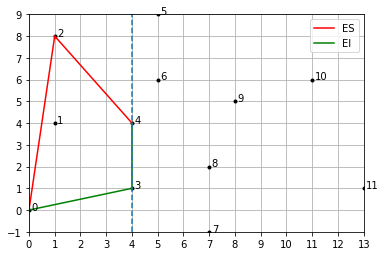

In [95]:
def convGraham2(tab, n):
    es = newStack()
    ei = newStack()
    push(0, ei)
    push(0, es)
    a = []
    b = []
    a.append(es[:])
    b.append(ei[:])
    for i in range(1,n):
        majES(tab,es,i)
        majEI(tab,ei,i)
        a.append(es[:])
        b.append(ei[:])
    pop(es)
    while not isEmpty(es):
        push(pop(es),ei)
    pop(ei)
    return a,b,ei

a,b,ei = convGraham2(tab,len(tab))

plt.xlim([0,13])
plt.ylim([-1,9])
plt.xticks([i for i in range(14)])
plt.yticks([i for i in range(-1,10)])
for p in range(len(tab)):
    plt.plot(tab[p][0], tab[p][1],".",color="black")
    plt.text(tab[p][0]+0.1, tab[p][1],"{}".format(p))
plt.plot([tab[i][0] for i in a[4]],[tab[i][1] for i in a[4]],"r",label="ES")
plt.plot([tab[i][0] for i in b[4]],[tab[i][1] for i in b[4]],"g",label="EI")
plt.plot([4,4],[-1,9],"--")
plt.legend()
plt.grid()
plt.show()

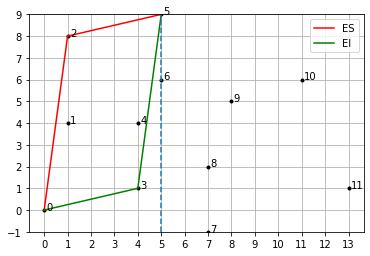

In [97]:
a,b,ei = convGraham2(tab,len(tab))

plt.ylim([-1,9])
plt.xticks([i for i in range(14)])
plt.yticks([i for i in range(-1,10)])
for p in range(len(tab)):
    plt.plot(tab[p][0], tab[p][1],".",color="black")
    plt.text(tab[p][0]+0.1, tab[p][1],"{}".format(p))
plt.plot([tab[i][0] for i in a[5]],[tab[i][1] for i in a[5]],"r",label="ES")
plt.plot([tab[i][0] for i in b[5]],[tab[i][1] for i in b[5]],"g",label="EI")
plt.plot([5,5],[-1,9],"--")
plt.legend()
plt.grid()
plt.show()

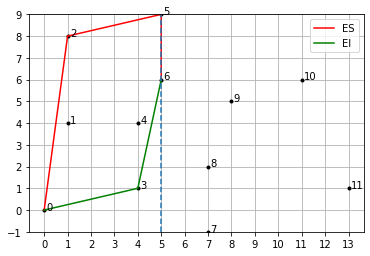

In [98]:
a,b,ei = convGraham2(tab,len(tab))

plt.ylim([-1,9])
plt.xticks([i for i in range(14)])
plt.yticks([i for i in range(-1,10)])
for p in range(len(tab)):
    plt.plot(tab[p][0], tab[p][1],".",color="black")
    plt.text(tab[p][0]+0.1, tab[p][1],"{}".format(p))
plt.plot([tab[i][0] for i in a[6]],[tab[i][1] for i in a[6]],"r",label="ES")
plt.plot([tab[i][0] for i in b[6]],[tab[i][1] for i in b[6]],"g",label="EI")
plt.plot([5,5],[-1,9],"--")
plt.legend()
plt.grid()
plt.show()

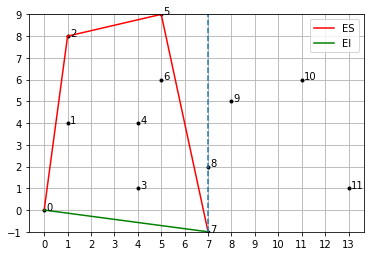

In [100]:
a,b,ei = convGraham2(tab,len(tab))

plt.ylim([-1,9])
plt.xticks([i for i in range(14)])
plt.yticks([i for i in range(-1,10)])
for p in range(len(tab)):
    plt.plot(tab[p][0], tab[p][1],".",color="black")
    plt.text(tab[p][0]+0.1, tab[p][1],"{}".format(p))
plt.plot([tab[i][0] for i in a[7]],[tab[i][1] for i in a[7]],"r",label="ES")
plt.plot([tab[i][0] for i in b[7]],[tab[i][1] for i in b[7]],"g",label="EI")
plt.plot([7,7],[-1,9],"--")
plt.legend()
plt.grid()
plt.show()

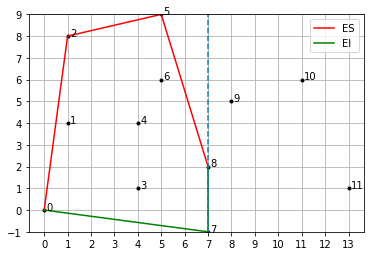

In [103]:
a,b,ei = convGraham2(tab,len(tab))

plt.ylim([-1,9])
plt.xticks([i for i in range(14)])
plt.yticks([i for i in range(-1,10)])
for p in range(len(tab)):
    plt.plot(tab[p][0], tab[p][1],".",color="black")
    plt.text(tab[p][0]+0.1, tab[p][1],"{}".format(p))
plt.plot([tab[i][0] for i in a[8]],[tab[i][1] for i in a[8]],"r",label="ES")
plt.plot([tab[i][0] for i in b[8]],[tab[i][1] for i in b[8]],"g",label="EI")
plt.plot([7,7],[-1,9],"--")
plt.legend()
plt.grid()
plt.show()

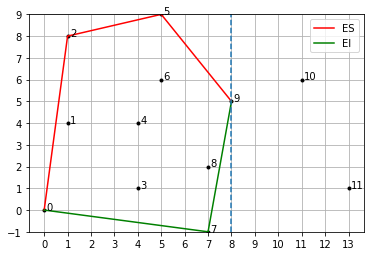

In [104]:
a,b,ei = convGraham2(tab,len(tab))

plt.ylim([-1,9])
plt.xticks([i for i in range(14)])
plt.yticks([i for i in range(-1,10)])
for p in range(len(tab)):
    plt.plot(tab[p][0], tab[p][1],".",color="black")
    plt.text(tab[p][0]+0.1, tab[p][1],"{}".format(p))
plt.plot([tab[i][0] for i in a[9]],[tab[i][1] for i in a[9]],"r",label="ES")
plt.plot([tab[i][0] for i in b[9]],[tab[i][1] for i in b[9]],"g",label="EI")
plt.plot([8,8],[-1,9],"--")
plt.legend()
plt.grid()
plt.show()

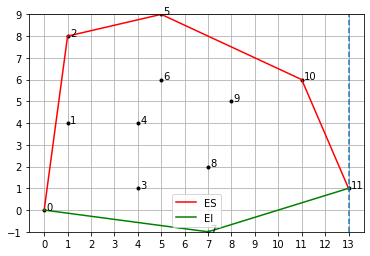

In [105]:
a,b,ei = convGraham2(tab,len(tab))

plt.ylim([-1,9])
plt.xticks([i for i in range(14)])
plt.yticks([i for i in range(-1,10)])
for p in range(len(tab)):
    plt.plot(tab[p][0], tab[p][1],".",color="black")
    plt.text(tab[p][0]+0.1, tab[p][1],"{}".format(p))
plt.plot([tab[i][0] for i in a[-1]],[tab[i][1] for i in a[-1]],"r",label="ES")
plt.plot([tab[i][0] for i in b[-1]],[tab[i][1] for i in b[-1]],"g",label="EI")
plt.plot([13,13],[-1,9],"--")
plt.legend()
plt.grid()
plt.show()